# IBM HR Analytics Employee Attrition & Performance

### In this notebook, I will try to predict if an employee whetever the employee is attrition or not

In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, KFold
from sklearn import metrics
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve,classification_report,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler


### Uploading and showing the data

In [149]:
data = pd.read_csv(r'C:\Users\meirk\Desktop\Ariel\semester A 1st year\data_sceince\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [150]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [151]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Explaining The Features

**Age:** How old the employee is.<br>
**Attrition:** Does the employee attrition or not.<br>
**BusinessTravel:** How frequent the employee is traveling on behalf work.<br>
**DailyRate:** How much money the employee raise per day.<br>
**Department:** In which depratment the employee works.<br>
**DistanceFromHome:** How far the office is far from the employees's home.<br>
**Education:** How 'educated' the employee (from below college (1) to doctor (4)).<br>
**EducationField:** The employee's proffesion.<br>
**EmployeeCount:** Always 1, useless. will be dropped in the future.<br>
**EmployeeNumber:** Identifying the employee.<br>
**EnvironmentSatisfaction:** How satisfied the employee from the enviroment in work.<br>
**Gender:** Male of Female.<br>
**HourlyRate:** Hourly salary.<br>
**JobInvolvement:** How involved the employee is.<br>
**JobLevel:** Level of job.<br>
**JobRole:** The role of the employee.<br>
**JobSatisfaction:** How satisfied the employee from the his job.<br>
**MaritalStatus:** single\married\divorced.<br>
**MonthlyIncome:** Monthly salary.<br>
**MonthlyRate:** Monthly rate- how much the emloyee 'costs' to the company.<br>
**NumCompaniesWorked:** For how many companies did the employee work.<br>
**Over18:** Is the employee over 18.<br>
**OverTime:** Does the work overtime hours.<br>
**PercentSalaryHike:** Precentage increase in salary.<br>
**PerformanceRating:** Preformance rating.<br>
**RelationshipSatisfaction:** How satisfied the employee form his relationship.<br>
**StandardHours:** Standard hours per month.<br>
**StockOptionLevel:** How many stock of the company the employee has.<br>
**TotalWorkingYears:** How many years the employee is in the institution.<br>
**TrainingTimesLastYear:** How many hours the employee spent in training.<br>
**WorkLifeBalance:** Spending time in work vs outside.<br>
**YearsAtCompany:** How many years the employee is working in the company.<br>
**YearsInCurrentRole:** For how many years the employee is in his current role.<br>
**YearsSinceLastPromotion:** How many years has passed since the employee's last promotion.<br>
**YearsWithCurrManager:** How many years the employee is working under his current manager.<br>

My goal is to predict whetever the employee is attrition or not, so lets see how many employees are worn and how many are not worn:

In [152]:
how_many = data['Attrition'].value_counts()
how_many

No     1233
Yes     237
Name: Attrition, dtype: int64

In [153]:
no_precent = (how_many['No'] / len(data)) * 100
yes_precent = (how_many['Yes'] / len(data)) * 100
pd.DataFrame(data = {'No': [no_precent], 'Yes': [yes_precent]})

,No,Yes
0,83.877551,16.122449


As we can see, the majority of the employees, 1233 of them, which are 83.87% are not attrition, and only 237 of them, which are 16.12% are indeed attrition.

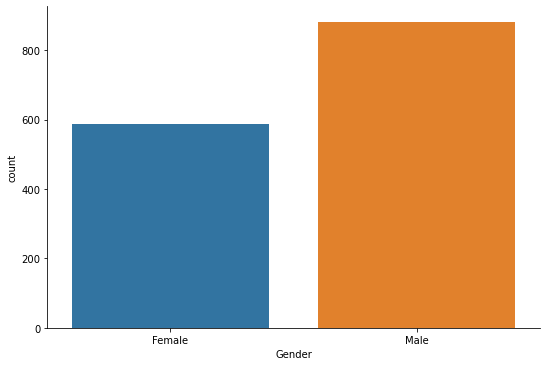

In [154]:
sns.catplot(data=data,kind='count',height=5,aspect=1.5,x='Gender')

In [155]:
att_f = len(data.loc[((data.Attrition == 'Yes') & (data.Gender == 'Female'))])
female = len(data['Gender'] == 'Female')
att_f_precent = (att_f / female) * 100
att_m = len(data.loc[((data.Attrition == 'Yes') & (data.Gender == 'Male'))])
Male = len(data['Gender'] == 'Male')
att_m_precent = (att_m / Male) * 100
pd.DataFrame({'Male attriton':[att_m_precent],'Female attrition':[att_f_precent]})

,Male attriton,Female attrition
0,10.204082,5.918367


## Looking at the caterogical features

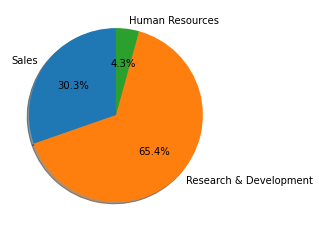

In [156]:
sizes = []
labels = data['Department'].unique()
for i in labels:
    sizes.append((len(data.loc[data['Department'] == i]) / len(data)) * 100)


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,  autopct='%1.1f%%',
        shadow=True, startangle=90);

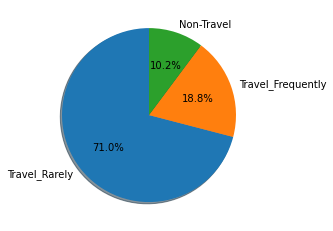

In [157]:
sizes_b = []
labels_b = data['BusinessTravel'].unique()
for i in labels_b:
    sizes_b.append((len(data.loc[data['BusinessTravel'] == i]) / len(data)) * 100)


fig1, ax1 = plt.subplots()
ax1.pie(sizes_b, labels=labels_b,  autopct='%1.1f%%',
        shadow=True, startangle=90);

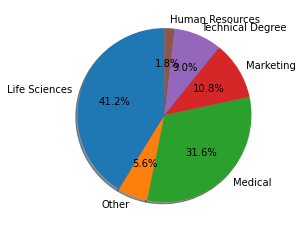

In [158]:
sizes_e = []
labels_e = data['EducationField'].unique()
for i in labels_e:
    sizes_e.append((len(data.loc[data['EducationField'] == i]) / len(data)) * 100)


fig1, ax1 = plt.subplots()
ax1.pie(sizes_e, labels=labels_e,  autopct='%1.1f%%'
        ,shadow=True,labeldistance= 1.1, startangle=90);

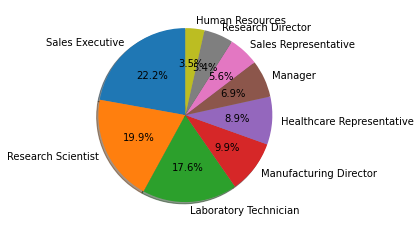

In [159]:
sizes_j = []
labels_j = data['JobRole'].unique()
for i in labels_j:
    sizes_j.append((len(data.loc[data['JobRole'] == i]) / len(data)) * 100)


fig1, ax1 = plt.subplots()
ax1.pie(sizes_j, labels=labels_j,  autopct='%1.1f%%'
        ,shadow=True,labeldistance= 1.1, startangle=90);

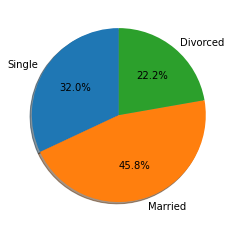

In [160]:
sizes_m = []
labels_m = data['MaritalStatus'].unique()
for i in labels_m:
    sizes_m.append((len(data.loc[data['MaritalStatus'] == i]) / len(data)) * 100)


fig1, ax1 = plt.subplots()
ax1.pie(sizes_m, labels=labels_m,  autopct='%1.1f%%'
        ,shadow=True,labeldistance= 1.1, startangle=90);

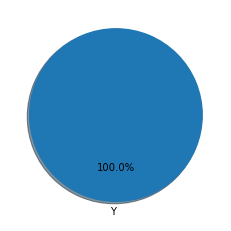

In [161]:
sizes_18 = []
labels_18 = data['Over18'].unique()
for i in labels_18:
    sizes_18.append((len(data.loc[data['Over18'] == i]) / len(data)) * 100)


fig1, ax1 = plt.subplots()
ax1.pie(sizes_18, labels=labels_18,  autopct='%1.1f%%'
        ,shadow=True,labeldistance= 1.1, startangle=90);

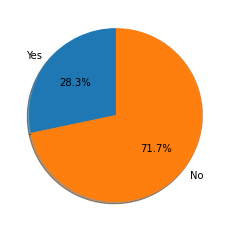

In [162]:
sizes_o = []
labels_o = data['OverTime'].unique()
for i in labels_o:
    sizes_o.append((len(data.loc[data['OverTime'] == i]) / len(data)) * 100)

fig1, ax1 = plt.subplots()
ax1.pie(sizes_o, labels=labels_o,  autopct='%1.1f%%'
        ,shadow=True,labeldistance= 1.1, startangle=90);

Lets try to investigate the causes to the attrition of the employees.

The first possible factor might be the **distance from home:**

,DistanceFromHome
1,208
2,211
3,84
4,64
5,65
6,59
7,84
8,80
9,85
10,86


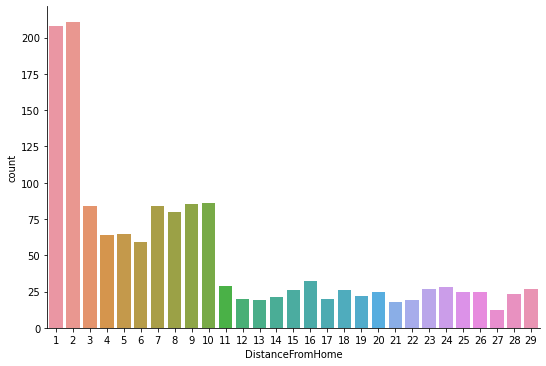

In [163]:
distance_df = pd.DataFrame(data['DistanceFromHome'].value_counts().sort_index(ascending = True))

sns.catplot(data=data,kind='count',height=5,aspect=1.5,x='DistanceFromHome')
distance_df

In [164]:
for i in range(1,30):
    sum_ = len(data.loc[(data['DistanceFromHome'] == i) & (data['Attrition'] == 'Yes')])
    print("In category ", i,", ",sum_, "employees out of ", distance_df['DistanceFromHome'][i] ," are attrition")

In category  1 ,  26 employees out of  208  are attrition
In category  2 ,  28 employees out of  211  are attrition
In category  3 ,  14 employees out of  84  are attrition
In category  4 ,  9 employees out of  64  are attrition
In category  5 ,  10 employees out of  65  are attrition
In category  6 ,  7 employees out of  59  are attrition
In category  7 ,  11 employees out of  84  are attrition
In category  8 ,  10 employees out of  80  are attrition
In category  9 ,  18 employees out of  85  are attrition
In category  10 ,  11 employees out of  86  are attrition
In category  11 ,  4 employees out of  29  are attrition
In category  12 ,  6 employees out of  20  are attrition
In category  13 ,  6 employees out of  19  are attrition
In category  14 ,  4 employees out of  21  are attrition
In category  15 ,  5 employees out of  26  are attrition
In category  16 ,  7 employees out of  32  are attrition
In category  17 ,  5 employees out of  20  are attrition
In category  18 ,  4 employees

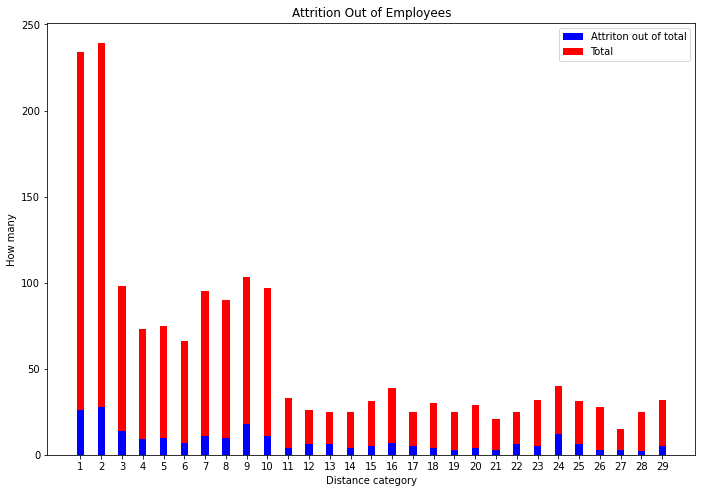

In [165]:
sum_list = []
for i in range(1,30):
    sum_ = len(data.loc[(data['DistanceFromHome'] == i) & (data['Attrition'] == 'Yes')])
    sum_list.append(sum_)
    
ind = np.arange(1,30)
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.bar(ind, np.array(sum_list), width, color = 'b')
ax.bar(ind, np.array(distance_df['DistanceFromHome']), width, bottom = np.array(sum_list), color = 'r')
ax.set_xticks(np.arange(1,30))
ax.set_ylabel("How many")
ax.set_xlabel("Distance category")
ax.set_title('Attrition Out of Employees')
ax.legend(labels = ['Attriton out of total','Total'])

In [166]:
relation_df = pd.DataFrame(data['RelationshipSatisfaction'].value_counts().sort_index(ascending = True))

pd.crosstab(columns=data.Attrition,index=data['DistanceFromHome'],margins=True,normalize='index')


Attrition,No,Yes
DistanceFromHome,,
1,0.875000,0.125000
2,0.867299,0.132701
3,0.833333,0.166667
4,0.859375,0.140625
5,0.846154,0.153846
6,0.881356,0.118644
7,0.869048,0.130952
8,0.875000,0.125000
9,0.788235,0.211765


Another possible factor might be the **relationship satisfaction of the employee:**

In [167]:
rel_list = []
for i in range(1,5):
    sum_ = len(data.loc[(data['RelationshipSatisfaction'] == i) & (data['Attrition'] == 'Yes')])
    rel_list.append(sum_)
    print("In category ", i,", ",sum_, "employees out of ",relation_df['RelationshipSatisfaction'][i] ," are attrition")

In category  1 ,  57 employees out of  276  are attrition
In category  2 ,  45 employees out of  303  are attrition
In category  3 ,  71 employees out of  459  are attrition
In category  4 ,  64 employees out of  432  are attrition


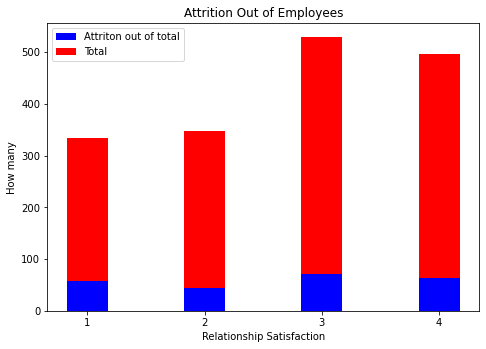

In [168]:
ind = [1,2,3,4]
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, np.array(rel_list), width, color = 'b')
ax.bar(ind, np.array(relation_df['RelationshipSatisfaction']), width, bottom = np.array(rel_list), color = 'r')
ax.set_xticks(np.arange(1,5))
ax.set_ylabel("How many")
ax.set_xlabel("Relationship Satisfaction")
ax.set_title('Attrition Out of Employees')
ax.legend(labels = ['Attriton out of total','Total'])

In [169]:
pd.crosstab(columns=data.Attrition,index=data['RelationshipSatisfaction'],margins=True,normalize='index')


Attrition,No,Yes
RelationshipSatisfaction,,
1,0.793478,0.206522
2,0.851485,0.148515
3,0.845316,0.154684
4,0.851852,0.148148
All,0.838776,0.161224


Another possible factor might be a cause is the time that has passed since the **last promotion:**

,YearsSinceLastPromotion
0,581
1,357
2,159
3,52
4,61
5,45
6,32
7,76
8,18
9,17


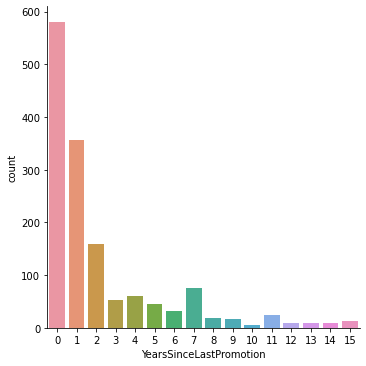

In [170]:
promotion_df = pd.DataFrame(data['YearsSinceLastPromotion'].value_counts().sort_index(ascending = True))

sns.catplot(data=data,kind='count',height=5,aspect=1,x='YearsSinceLastPromotion')
promotion_df

In [171]:
pro_list = []
for i in range(len(promotion_df)):
    sum_ = len(data.loc[(data['YearsSinceLastPromotion'] == i) & (data['Attrition'] == 'Yes')])
    pro_list.append(sum_)
    print("In category ", i,", ",sum_, "employees out of ",promotion_df['YearsSinceLastPromotion'][i] ," are attrition")

In category  0 ,  110 employees out of  581  are attrition
In category  1 ,  49 employees out of  357  are attrition
In category  2 ,  27 employees out of  159  are attrition
In category  3 ,  9 employees out of  52  are attrition
In category  4 ,  5 employees out of  61  are attrition
In category  5 ,  2 employees out of  45  are attrition
In category  6 ,  6 employees out of  32  are attrition
In category  7 ,  16 employees out of  76  are attrition
In category  8 ,  0 employees out of  18  are attrition
In category  9 ,  4 employees out of  17  are attrition
In category  10 ,  1 employees out of  6  are attrition
In category  11 ,  2 employees out of  24  are attrition
In category  12 ,  0 employees out of  10  are attrition
In category  13 ,  2 employees out of  10  are attrition
In category  14 ,  1 employees out of  9  are attrition
In category  15 ,  3 employees out of  13  are attrition


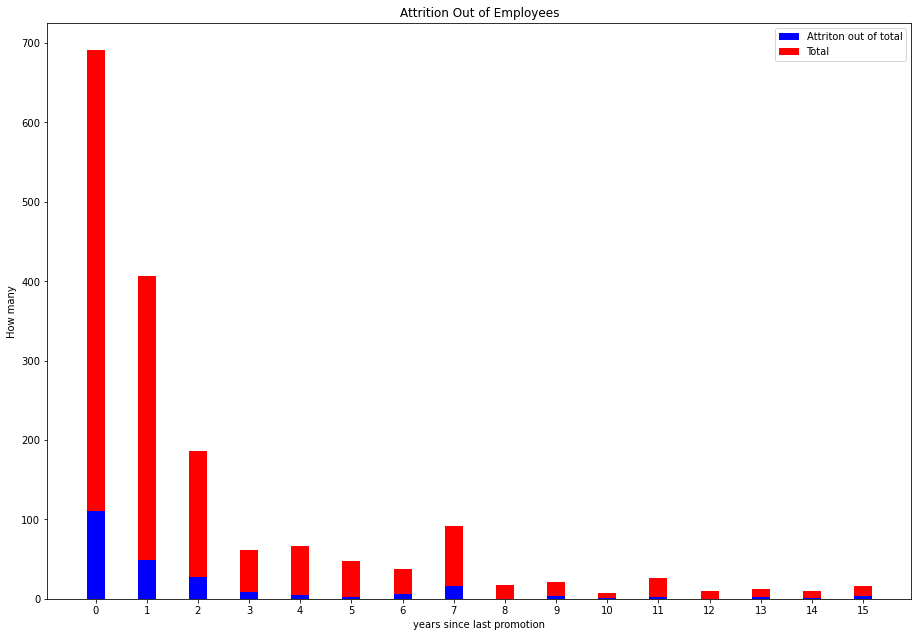

In [172]:
ind = np.arange(16)
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(ind, np.array(pro_list), width, color = 'b')
ax.bar(ind, np.array(promotion_df['YearsSinceLastPromotion']), width, bottom = np.array(pro_list), color = 'r')
ax.set_xticks(np.arange(0,16))
ax.set_ylabel("How many")
ax.set_xlabel("years since last promotion")
ax.set_title('Attrition Out of Employees')
ax.legend(labels = ['Attriton out of total','Total'])

In [173]:
pd.crosstab(columns=data.Attrition,index=data.YearsSinceLastPromotion,margins=True,normalize='index')

Attrition,No,Yes
YearsSinceLastPromotion,,
0,0.810671,0.189329
1,0.862745,0.137255
2,0.830189,0.169811
3,0.826923,0.173077
4,0.918033,0.081967
5,0.955556,0.044444
6,0.812500,0.187500
7,0.789474,0.210526
8,1.000000,0.000000


The last factor might be a cause is how many years the employee is working in his **current role:**

,YearsInCurrentRole
0,244
1,57
2,372
3,135
4,104
5,36
6,37
7,222
8,89
9,67


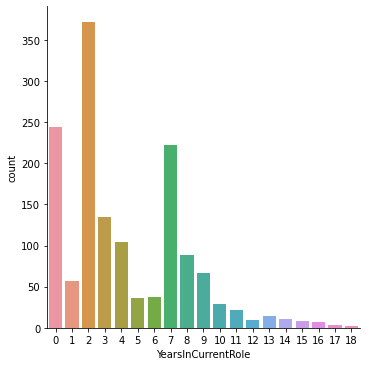

In [174]:
role_df = pd.DataFrame(data['YearsInCurrentRole'].value_counts().sort_index(ascending = True))

sns.catplot(data=data,kind='count',height=5,aspect=1,x='YearsInCurrentRole')
role_df

In [175]:
role_list = []
for i in range(len(role_df)):
    sum_ = len(data.loc[(data['YearsInCurrentRole'] == i) & (data['Attrition'] == 'Yes')])
    role_list.append(sum_)
    print("In category ", i,", ",sum_, "employees out of ",role_df['YearsInCurrentRole'][i] ," are attrition")

In category  0 ,  73 employees out of  244  are attrition
In category  1 ,  11 employees out of  57  are attrition
In category  2 ,  68 employees out of  372  are attrition
In category  3 ,  16 employees out of  135  are attrition
In category  4 ,  15 employees out of  104  are attrition
In category  5 ,  1 employees out of  36  are attrition
In category  6 ,  2 employees out of  37  are attrition
In category  7 ,  31 employees out of  222  are attrition
In category  8 ,  7 employees out of  89  are attrition
In category  9 ,  6 employees out of  67  are attrition
In category  10 ,  2 employees out of  29  are attrition
In category  11 ,  0 employees out of  22  are attrition
In category  12 ,  1 employees out of  10  are attrition
In category  13 ,  1 employees out of  14  are attrition
In category  14 ,  1 employees out of  11  are attrition
In category  15 ,  2 employees out of  8  are attrition
In category  16 ,  0 employees out of  7  are attrition
In category  17 ,  0 employees o

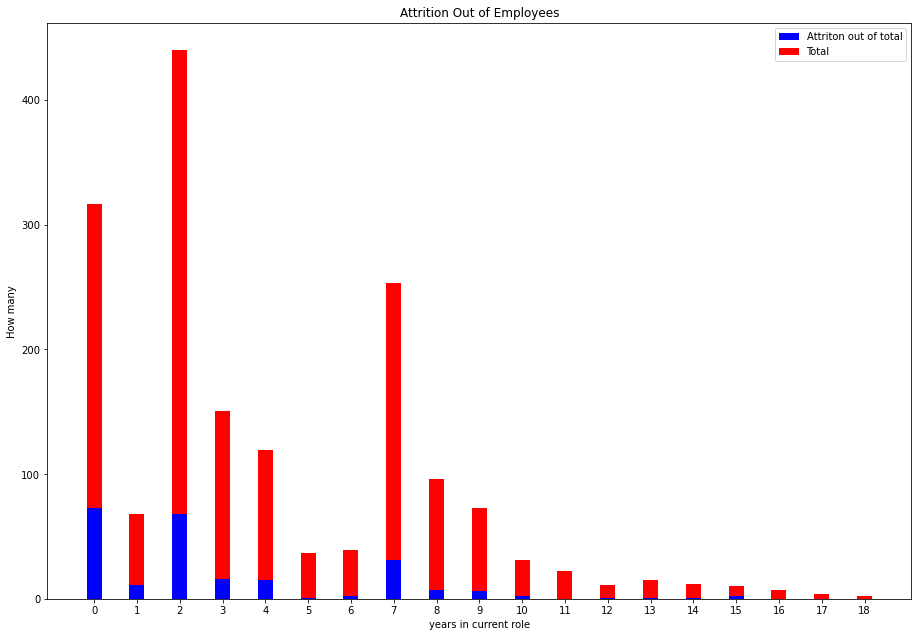

In [176]:
ind = np.arange(19)
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(ind, np.array(role_list), width, color = 'b')
ax.bar(ind, np.array(role_df['YearsInCurrentRole']), width, bottom = np.array(role_list), color = 'r')
ax.set_xticks(np.arange(0,19))
ax.set_ylabel("How many")
ax.set_xlabel("years in current role")
ax.set_title('Attrition Out of Employees')
ax.legend(labels = ['Attriton out of total','Total'])

In [177]:
pd.crosstab(columns=data.Attrition,index=data.YearsInCurrentRole,margins=True,normalize='index')

Attrition,No,Yes
YearsInCurrentRole,,
0,0.700820,0.299180
1,0.807018,0.192982
2,0.817204,0.182796
3,0.881481,0.118519
4,0.855769,0.144231
5,0.972222,0.027778
6,0.945946,0.054054
7,0.860360,0.139640
8,0.921348,0.078652


In conclusion:
* Men are more attrition than female.
* 5.91% Females are attrition, 10.2% males are attrition.
* There are some factors that can be a cause to attrition, i presented some of them (not all of them). 
* Distance from home does not have a high effect, the high majority in each category is not attrition.
* A bad relationship has a high effect on attrition.
* surprisingly,  the year that has passed since the last promotion does not have much effect.
* As opposed to the last section, we can see that working in the same role for several years raises the odds to be attrition. 

## Checking correlation

In [178]:
data = data.replace({'Yes': 1 , 'No':0})
attrition_corr = data.corrwith(data['Attrition'].sort_values(ascending = False))
attrition_corr

Age                        -0.159205
Attrition                   1.000000
DailyRate                  -0.056652
DistanceFromHome            0.077924
Education                  -0.031373
EmployeeCount                    NaN
EmployeeNumber             -0.010577
EnvironmentSatisfaction    -0.103369
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobSatisfaction            -0.103481
MonthlyIncome              -0.159840
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
OverTime                    0.246118
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StandardHours                    NaN
StockOptionLevel           -0.137145
TotalWorkingYears          -0.171063
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
YearsAtCompany             -0.134392
YearsInCurrentRole         -0.160545
YearsSinceLastPromotion    -0.033019
Y

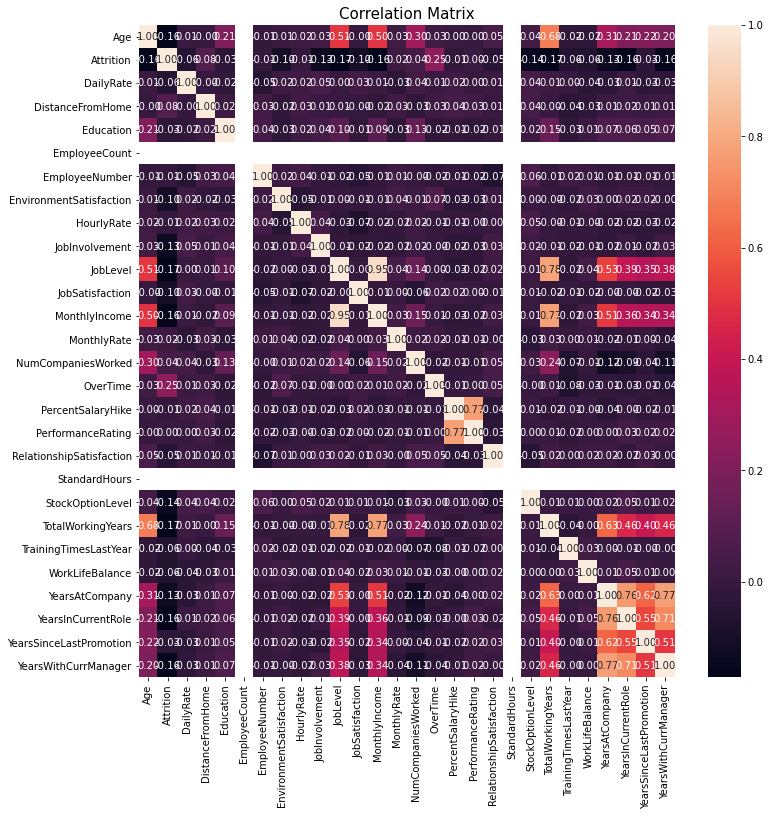

In [179]:
plt.figure(figsize = (12,12))
corr=data.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Matrix",size=15)
plt.show()

The dataset has high number of features. In order to try make the model more efficient I will drop every features which doesn't have high correlation (high = less than 10%) with Attrition, hoping this will help me build good model.

In [180]:
data = data.drop(['BusinessTravel','DailyRate','Department','DistanceFromHome','Education','EducationField',
                 'EmployeeCount','EmployeeNumber','Gender','HourlyRate','JobRole','MonthlyRate',
                 'NumCompaniesWorked','Over18','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction',
                 'StandardHours','TrainingTimesLastYear','WorkLifeBalance','YearsSinceLastPromotion'],axis = 1)

In [181]:
data

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1,2,3,2,4,Single,5993,1,0,8,6,4,5
1,49,0,3,2,2,2,Married,5130,0,1,10,10,7,7
2,37,1,4,2,1,3,Single,2090,1,0,7,0,0,0
3,33,0,4,3,1,3,Married,2909,1,0,8,8,7,0
4,27,0,1,3,1,2,Married,3468,0,1,6,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,3,4,2,4,Married,2571,0,1,17,5,2,3
1466,39,0,4,2,3,1,Married,9991,0,1,9,7,7,7
1467,27,0,2,4,2,2,Married,6142,1,1,6,6,2,3
1468,49,0,4,2,2,2,Married,5390,0,0,17,9,6,8


## Preparing the data to ML models

Encoding the categorical data:

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   int64 
 2   EnvironmentSatisfaction  1470 non-null   int64 
 3   JobInvolvement           1470 non-null   int64 
 4   JobLevel                 1470 non-null   int64 
 5   JobSatisfaction          1470 non-null   int64 
 6   MaritalStatus            1470 non-null   object
 7   MonthlyIncome            1470 non-null   int64 
 8   OverTime                 1470 non-null   int64 
 9   StockOptionLevel         1470 non-null   int64 
 10  TotalWorkingYears        1470 non-null   int64 
 11  YearsAtCompany           1470 non-null   int64 
 12  YearsInCurrentRole       1470 non-null   int64 
 13  YearsWithCurrManager     1470 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 15

Only one feature (MaritalStatus) is type of object, lets encoded it:

In [183]:
data['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [203]:
data['MaritalStatus']=preprocessing.LabelEncoder().fit_transform(data['MaritalStatus'])

In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1470 non-null   int64
 1   Attrition                1470 non-null   int64
 2   EnvironmentSatisfaction  1470 non-null   int64
 3   JobInvolvement           1470 non-null   int64
 4   JobLevel                 1470 non-null   int64
 5   JobSatisfaction          1470 non-null   int64
 6   MaritalStatus            1470 non-null   int32
 7   MonthlyIncome            1470 non-null   int64
 8   OverTime                 1470 non-null   int64
 9   StockOptionLevel         1470 non-null   int64
 10  TotalWorkingYears        1470 non-null   int64
 11  YearsAtCompany           1470 non-null   int64
 12  YearsInCurrentRole       1470 non-null   int64
 13  YearsWithCurrManager     1470 non-null   int64
dtypes: int32(1), int64(13)
memory usage: 155.1 KB


In [185]:
data.isnull().sum()

Age                        0
Attrition                  0
EnvironmentSatisfaction    0
JobInvolvement             0
JobLevel                   0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
OverTime                   0
StockOptionLevel           0
TotalWorkingYears          0
YearsAtCompany             0
YearsInCurrentRole         0
YearsWithCurrManager       0
dtype: int64

No, NaN values, no action required.

## Scaling and splitting to train and test

In [229]:
scaler = StandardScaler()
is_attrition = data['Attrition']
without_attrition = data.drop('Attrition',axis =1)
without_attrition = scaler.fit_transform(without_attrition)

without_attrition_train, without_attrition_test, is_attrition_train, is_attrition_test = train_test_split(without_attrition, is_attrition, test_size = 0.2, random_state = 1)

###### Before building models, i want to present some classification metrics:

* **Precision:** $\frac{TP}{TP+FP}$. Precision represent the TP rate out of all values which were predicted as positive.<br>
* **Recall:** $\frac{TP}{TP+FN}$  . Recall represent the TP rate out of all real positive values.
* **F1:** $\frac{TP}{TP+\frac{FN+FP}{2}}$. F1 score is combination of precision and recall. It is the harmonic mean of precision and recall, meaning it gives more weight to low values.

## Dummy classifier

In [240]:
dummy = DummyClassifier(strategy= 'uniform')
dummy.fit(without_attrition_train,is_attrition_train)
d_pred = dummy.predict(without_attrition_test)

In [242]:
metrics.accuracy_score(is_attrition_test, d_pred)

0.5306122448979592

## Making calssification using KNN 

Finding the best k value:

In [232]:
kfold = KFold(n_splits= 10, shuffle= True, random_state= 1)#for use below on other model

In [233]:
k_classi = KNeighborsClassifier()

In [234]:
grid_param = {'n_neighbors': list(np.arange(1,31)),
             'weights': ['uniform', 'distance'],
             'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(k_classi, grid_param, cv = kfold, return_train_score= True)
grid_search.fit(without_attrition_train, is_attrition_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             return_train_score=True)

In [235]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8707373605678692
{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}


GreadSearchCv tells us which parameters we suld use in order to get the best KNN model. For those parameters the mean score of cross vallidation is 0.87, not bad score! 

Lets build KNN callsifier with those parameters and see the result:

In [236]:
K_best = KNeighborsClassifier(n_neighbors= 12, weights='distance', algorithm='auto', metric= 'manhattan')
K_best.fit(without_attrition_train,is_attrition_train)
k_best_pred = K_best.predict(without_attrition_test)

In [237]:
print(np.unique(k_best_pred, return_counts= True))
print(np.unique(np.array(is_attrition_test), return_counts= True))

(array([0, 1], dtype=int64), array([281,  13]))
(array([0, 1], dtype=int64), array([236,  58]))


In [238]:
confusion = metrics.confusion_matrix(y_true=is_attrition_test, y_pred=k_best_pred)
pd.DataFrame(confusion, columns= ['No','Yes'], index = ['No', 'Yes'])

,No,Yes
No,234,2
Yes,47,11


* **TP** 11
* **FP** 2
* **TN** 234
* **FN** 47

In [243]:
print(classification_report(y_true=is_attrition_test, y_pred=k_best_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.91       236
           1       0.85      0.19      0.31        58

    accuracy                           0.83       294
   macro avg       0.84      0.59      0.61       294
weighted avg       0.84      0.83      0.79       294



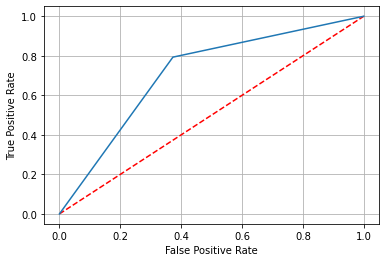

In [246]:
k_best_pred_proba = (K_best.predict_proba(without_attrition_test)[:, 1]>0.1).astype(int)
fpr, tpr, thresholds = metrics.roc_curve(is_attrition_test, k_best_pred_proba)
plt.plot([0,1], [0,1],'r--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

## Cross Vallidation

In [245]:
cro_vall_knn = cross_val_score(K_best, without_attrition_train, is_attrition_train, cv = kfold)
print(cro_vall_knn)
print('mean of cross vallidation score: ',cro_vall_knn.mean())

[0.87288136 0.86440678 0.8559322  0.89830508 0.86440678 0.88135593
 0.82051282 0.86324786 0.88888889 0.8974359 ]
mean of cross vallidation score:  0.8707373605678692


* The score of the model for the optimal k (12) is 83% (F1).
* The score of the model using cross vallidation is 87%.

## Making prediction using LogisticRegression

In [ ]:
log_reg = LogisticRegression(solver= 'liblinear')
log_reg.fit(X_train,y_train)
log_pred = log_reg.predict(X_test)

In [ ]:
print('Score of LogisticRegression model is: ', metrics.accuracy_score(y_test,log_pred))

In [ ]:
log_confutsion = metrics.confusion_matrix(y_true=y_test, y_pred=log_pred)
pd.DataFrame(log_confutsion, columns= ['negative','positive'], index = ['negative', 'positive'])

* **TP** 16
* **TN** 242
* **FP** 4
* **FN** 32

In [ ]:
cro_vall_log = cross_val_score(log_reg,X,y, cv =10)
print(cro_vall_log)
print('mean of cross vallidation score: ', cro_vall_log.mean())

In [ ]:
print(classification_report(y_true=y_test, y_pred=log_pred))

* The score of the model is 87.7%
* The score of the model using cross validation is 88%.

## Conclusion

* I trained two models- KNN classifier and logistic regression.
* For each model i found the score and the mean score of using cross validation.
* The score for KNN - 85% and for the logistic regression is 87.7%
* The cross vallidation score is 84.5% for KNN and  88% for logistic regression.